Text Clssification Tutorial, from Freecodecamp

diabetes.csv: Female, at least 25 years old

wine-reviews.csv:



In [1]:
# prep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("./diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Patient group, number difference:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

# using density function to normalise.

(268, 500)

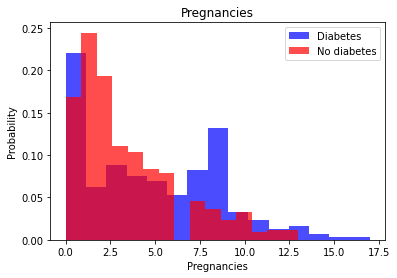

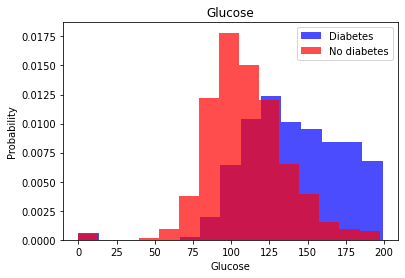

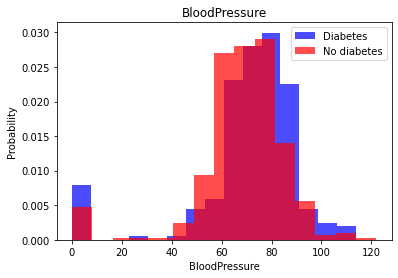

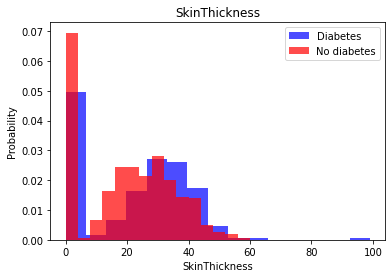

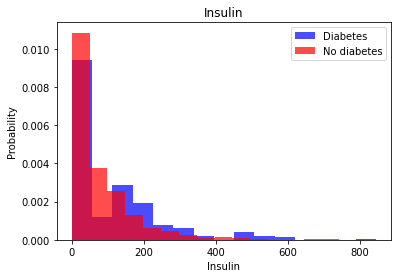

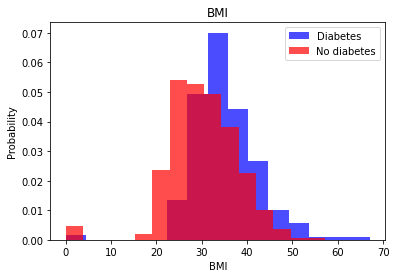

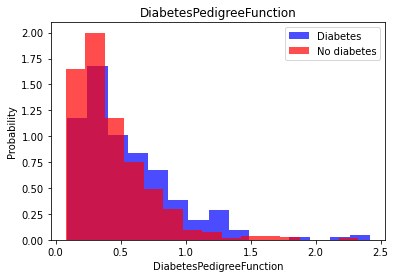

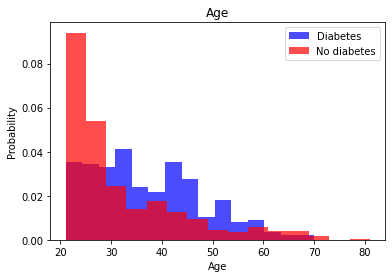

In [4]:
# visualisation
for i in range(len(df.columns[:-1])) :
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color = 'Blue', label = 'Diabetes', alpha = 0.7, density = True, bins = 15)
    plt.hist(df[df['Outcome']==0][label], color = 'red', label = 'No diabetes', alpha = 0.7, density = True, bins = 15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [5]:
# split the dataset into X and Y
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [6]:
#standardised scale
scaler = StandardScaler()
X = scaler.fit_transform(X)
# visualise the change, require df transformation
data = np.hstack((X, np.reshape(Y, (-1,1)))) #Y is a one dimensional array
transformed_df = pd.DataFrame(data, columns = df.columns)

In [7]:
#Patient group sample difference: we need randomoversampler
over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)


In [8]:
# visualise the change, require df transformation
data = np.hstack((X, np.reshape(Y, (-1,1)))) #Y is a one dimensional array
transformed_df = pd.DataFrame(data, columns = df.columns)

# check balance
len(transformed_df[transformed_df['Outcome']==0]), len(transformed_df[transformed_df['Outcome']==1])

(500, 500)

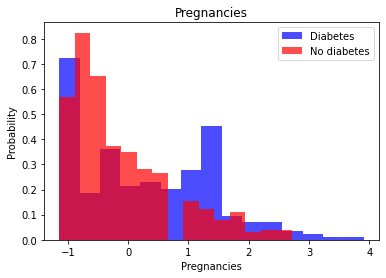

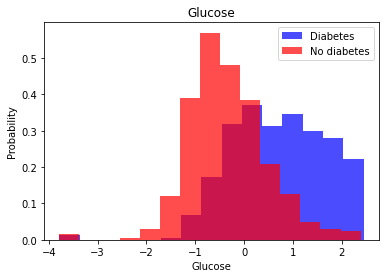

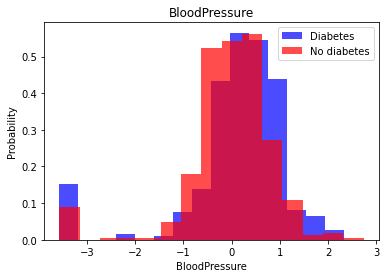

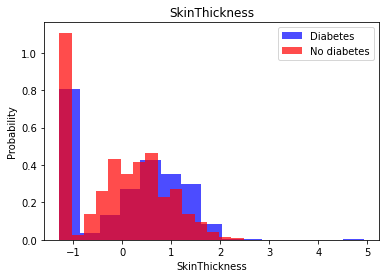

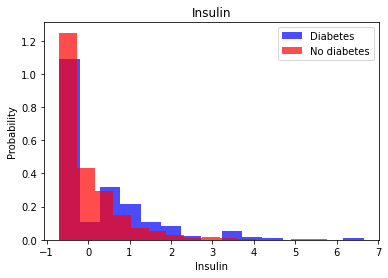

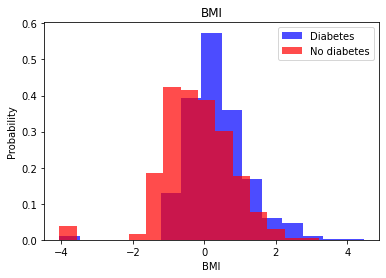

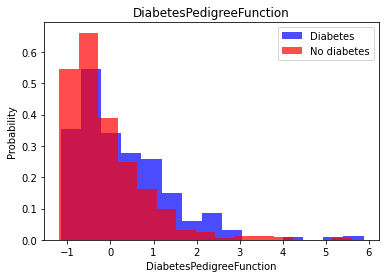

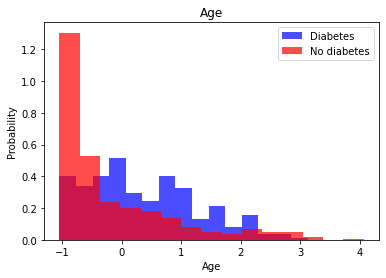

In [9]:
#plot the transformed dataset, mapping the stamdard distribution
for i in range(len(transformed_df.columns[:-1])) :
    label = transformed_df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label], color = 'Blue', label = 'Diabetes', alpha = 0.7, density = True, bins = 15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label], color = 'red', label = 'No diabetes', alpha = 0.7, density = True, bins = 15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [10]:
# split training and test dataset using sklearn model selection 
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size= 0.4, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size= 0.5, random_state=0)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu'), # relu x<= 0 --> 0
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # binary calssification
])

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [13]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 0s 667us/step - loss: 0.6914 - accuracy: 0.5133


[0.691376268863678, 0.5133333206176758]

In [14]:
model.evaluate(X_valid, Y_valid)

7/7 [==============================] - 0s 834us/step - loss: 0.6917 - accuracy: 0.4850


[0.6917141079902649, 0.48500001430511475]

In [15]:
# trainning
model.fit(X_train, Y_train, batch_size= 16, epochs= 20, validation_data=(X_valid, Y_valid))
# batch size, number of samples, training examples
# we need to look at the datasets' different scales, i.e DPF has range 0-0.25, go back to split

Epoch 1/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5650 - val_loss: 0.6418 - val_accuracy: 0.6450
Epoch 2/20
38/38 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7167 - val_loss: 0.6055 - val_accuracy: 0.7250
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.7233 - val_loss: 0.5674 - val_accuracy: 0.7350
Epoch 4/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7333 - val_loss: 0.5378 - val_accuracy: 0.7600
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7383 - val_loss: 0.5119 - val_accuracy: 0.7800
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.7433 - val_loss: 0.4900 - val_accuracy: 0.7800
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5096 - accuracy: 0.7433 - val_loss: 0.4770 - val_accuracy: 0.7750
Epoch 8/20
38/38 [==

In [16]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 667us/step - loss: 0.4538 - accuracy: 0.7900


[0.45384761691093445, 0.7900000214576721]

## Expanding on the topic 
- change model setups, trying to improve accuracy
- doing other supervised machine learning models
- result comparisons 

In [17]:
# functions from tensorflow tutorial:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [21]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


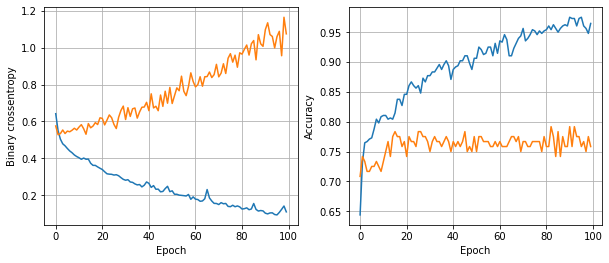

7/7 [==============================] - 0s 834us/step - loss: 0.7987 - accuracy: 0.7950
16 nodes, dropout 0, lr 0.01, batch size 64


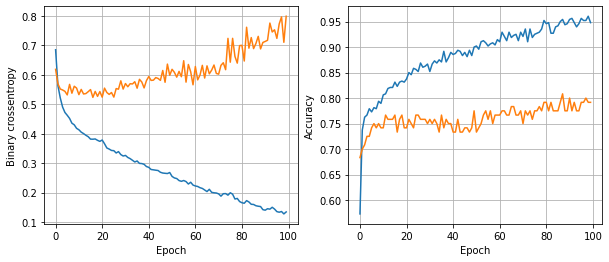

7/7 [==============================] - 0s 667us/step - loss: 0.7068 - accuracy: 0.8150
16 nodes, dropout 0, lr 0.01, batch size 128


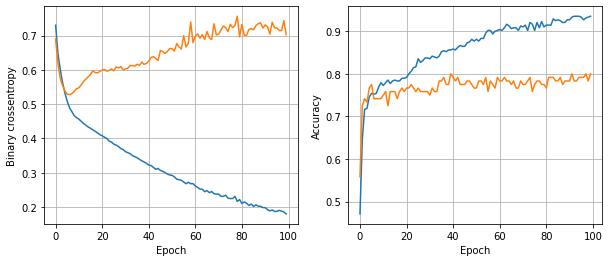

7/7 [==============================] - 0s 834us/step - loss: 0.6416 - accuracy: 0.7550
16 nodes, dropout 0, lr 0.005, batch size 32


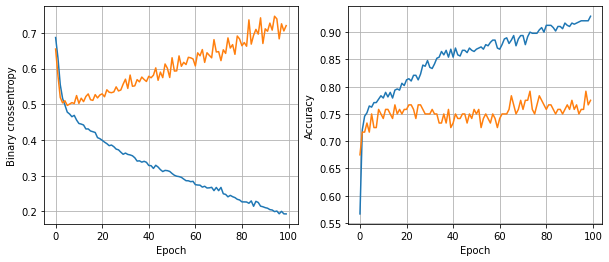

7/7 [==============================] - 0s 667us/step - loss: 0.6355 - accuracy: 0.7550
16 nodes, dropout 0, lr 0.005, batch size 64


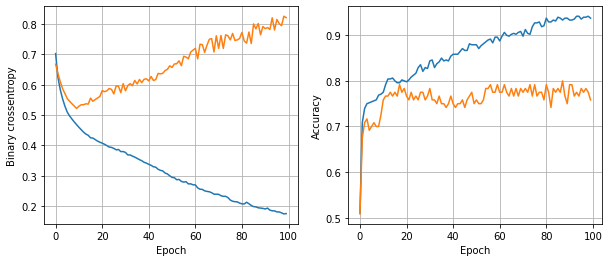

7/7 [==============================] - 0s 667us/step - loss: 0.6435 - accuracy: 0.7550
16 nodes, dropout 0, lr 0.005, batch size 128


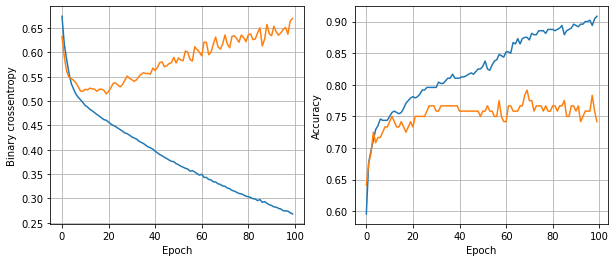

7/7 [==============================] - 0s 667us/step - loss: 0.5142 - accuracy: 0.7650
16 nodes, dropout 0, lr 0.001, batch size 32


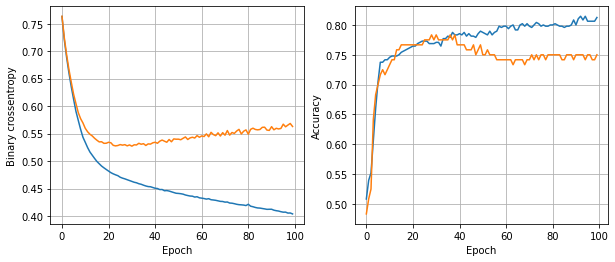

7/7 [==============================] - 0s 667us/step - loss: 0.4441 - accuracy: 0.8000
16 nodes, dropout 0, lr 0.001, batch size 64


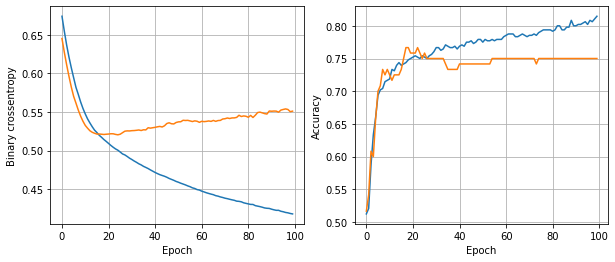

7/7 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.7650
16 nodes, dropout 0, lr 0.001, batch size 128


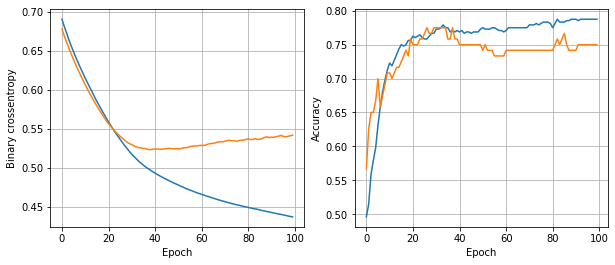

7/7 [==============================] - 0s 833us/step - loss: 0.4327 - accuracy: 0.8200
16 nodes, dropout 0.2, lr 0.01, batch size 32


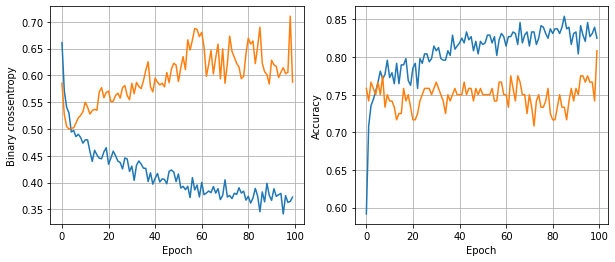

7/7 [==============================] - 0s 667us/step - loss: 0.4521 - accuracy: 0.8100
16 nodes, dropout 0.2, lr 0.01, batch size 64


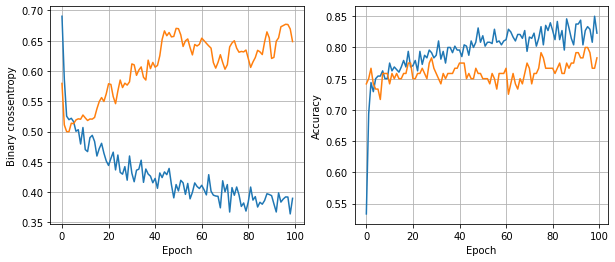

7/7 [==============================] - 0s 834us/step - loss: 0.4954 - accuracy: 0.8000
16 nodes, dropout 0.2, lr 0.01, batch size 128


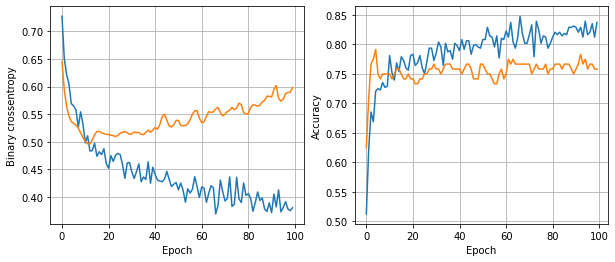

7/7 [==============================] - 0s 833us/step - loss: 0.4548 - accuracy: 0.7600
16 nodes, dropout 0.2, lr 0.005, batch size 32


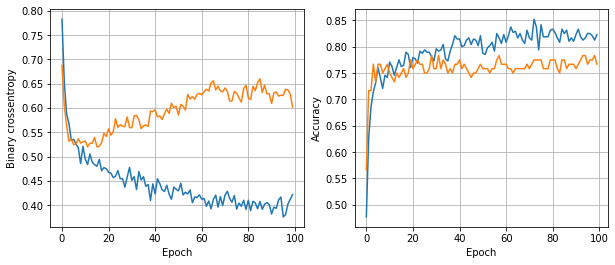

7/7 [==============================] - 0s 667us/step - loss: 0.4712 - accuracy: 0.8000
16 nodes, dropout 0.2, lr 0.005, batch size 64


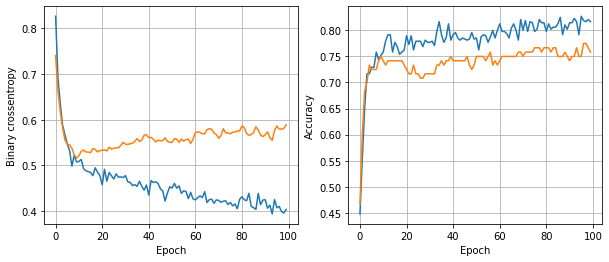

7/7 [==============================] - 0s 667us/step - loss: 0.4399 - accuracy: 0.7950
16 nodes, dropout 0.2, lr 0.005, batch size 128


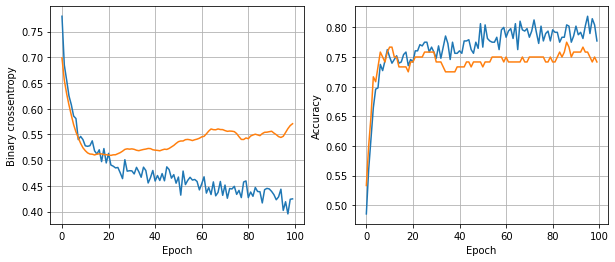

7/7 [==============================] - 0s 667us/step - loss: 0.4584 - accuracy: 0.8050
16 nodes, dropout 0.2, lr 0.001, batch size 32


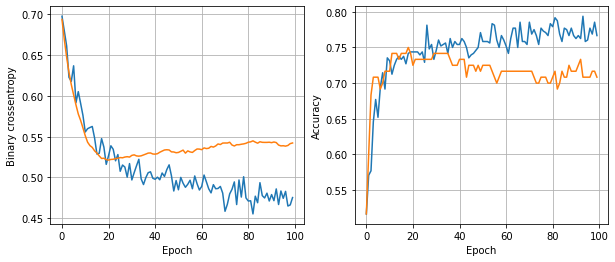

7/7 [==============================] - 0s 834us/step - loss: 0.4506 - accuracy: 0.8100
16 nodes, dropout 0.2, lr 0.001, batch size 64


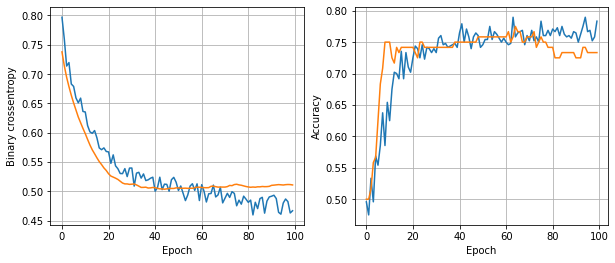

7/7 [==============================] - 0s 834us/step - loss: 0.4683 - accuracy: 0.7950
16 nodes, dropout 0.2, lr 0.001, batch size 128


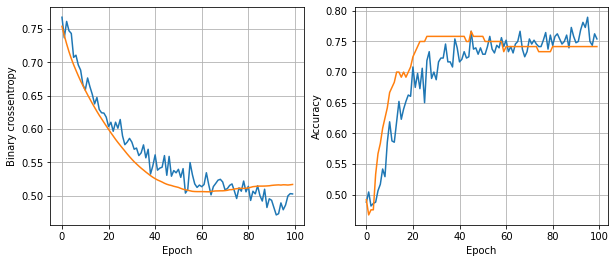

7/7 [==============================] - 0s 667us/step - loss: 0.4602 - accuracy: 0.7950
32 nodes, dropout 0, lr 0.01, batch size 32


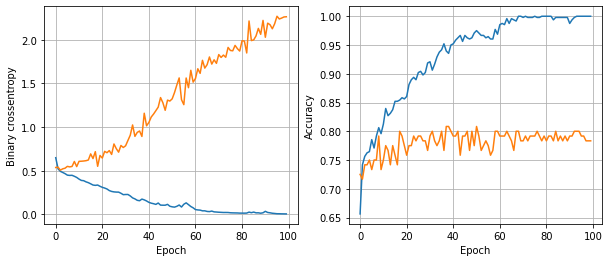

7/7 [==============================] - 0s 1ms/step - loss: 1.3857 - accuracy: 0.8000
32 nodes, dropout 0, lr 0.01, batch size 64


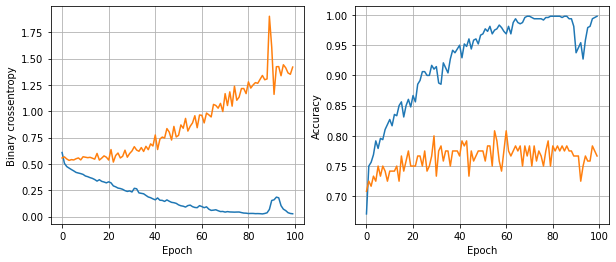

7/7 [==============================] - 0s 667us/step - loss: 1.2843 - accuracy: 0.7550
32 nodes, dropout 0, lr 0.01, batch size 128


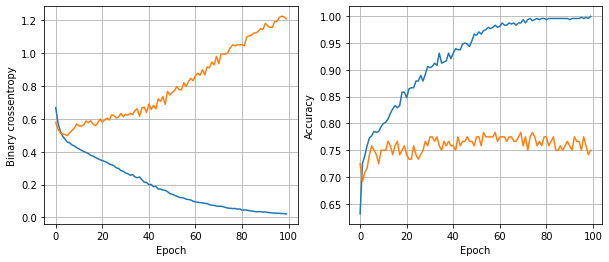

7/7 [==============================] - 0s 667us/step - loss: 0.9846 - accuracy: 0.7900
32 nodes, dropout 0, lr 0.005, batch size 32


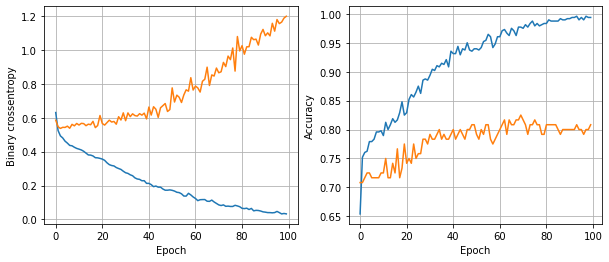

7/7 [==============================] - 0s 667us/step - loss: 0.8841 - accuracy: 0.7950
32 nodes, dropout 0, lr 0.005, batch size 64


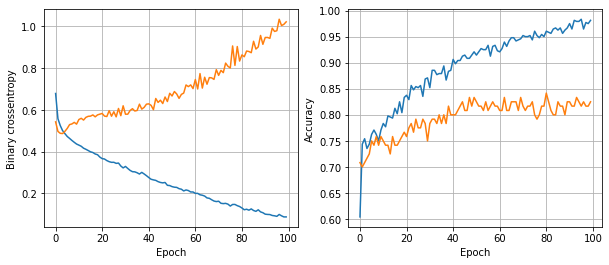

7/7 [==============================] - 0s 1ms/step - loss: 0.7864 - accuracy: 0.7850
32 nodes, dropout 0, lr 0.005, batch size 128


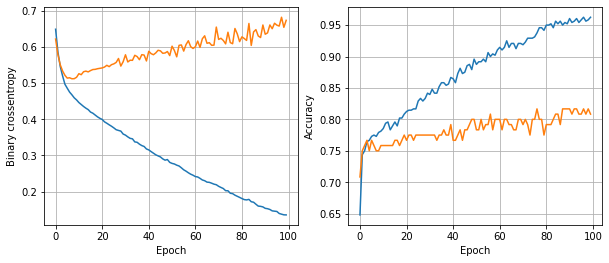

7/7 [==============================] - 0s 834us/step - loss: 0.5916 - accuracy: 0.7750
32 nodes, dropout 0, lr 0.001, batch size 32


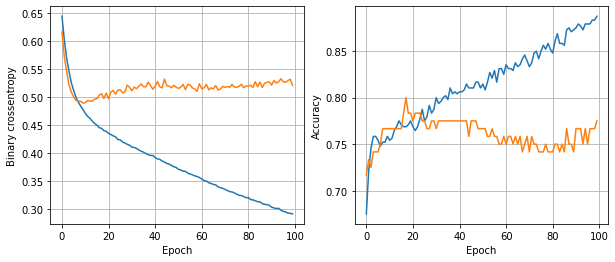

7/7 [==============================] - 0s 833us/step - loss: 0.4529 - accuracy: 0.7750
32 nodes, dropout 0, lr 0.001, batch size 64


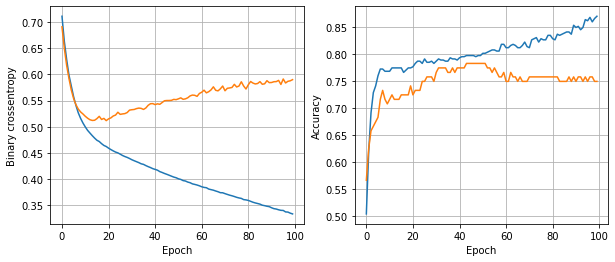

7/7 [==============================] - 0s 834us/step - loss: 0.4564 - accuracy: 0.7950
32 nodes, dropout 0, lr 0.001, batch size 128


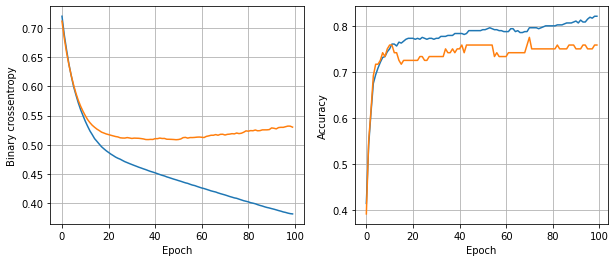

7/7 [==============================] - 0s 667us/step - loss: 0.4423 - accuracy: 0.7950
32 nodes, dropout 0.2, lr 0.01, batch size 32


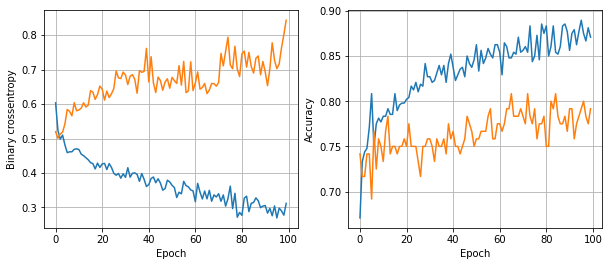

7/7 [==============================] - 0s 834us/step - loss: 0.5251 - accuracy: 0.7850
32 nodes, dropout 0.2, lr 0.01, batch size 64


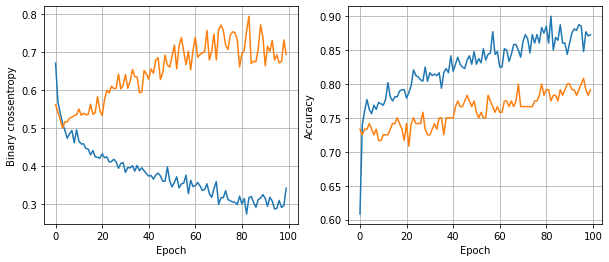

7/7 [==============================] - 0s 667us/step - loss: 0.5049 - accuracy: 0.8150
32 nodes, dropout 0.2, lr 0.01, batch size 128


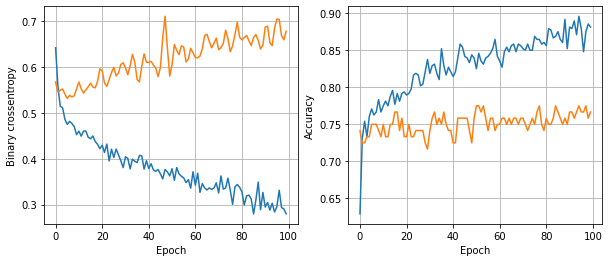

7/7 [==============================] - 0s 834us/step - loss: 0.4553 - accuracy: 0.8100
32 nodes, dropout 0.2, lr 0.005, batch size 32


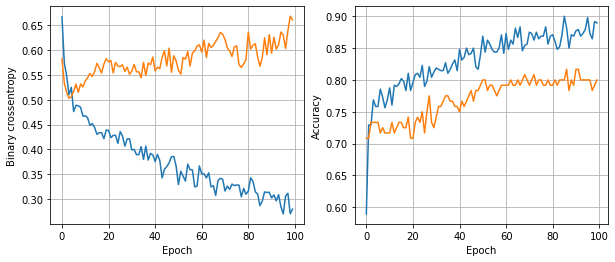

7/7 [==============================] - 0s 834us/step - loss: 0.4746 - accuracy: 0.8100
32 nodes, dropout 0.2, lr 0.005, batch size 64


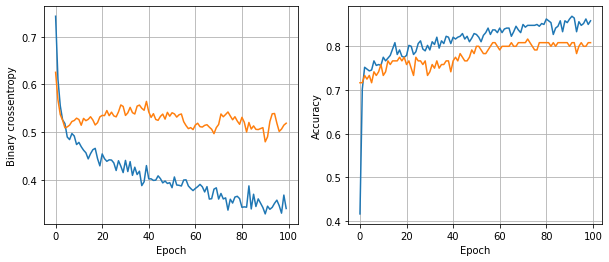

7/7 [==============================] - 0s 834us/step - loss: 0.4361 - accuracy: 0.7950
32 nodes, dropout 0.2, lr 0.005, batch size 128


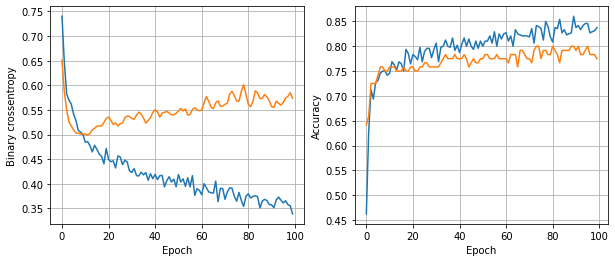

7/7 [==============================] - 0s 667us/step - loss: 0.4486 - accuracy: 0.8000
32 nodes, dropout 0.2, lr 0.001, batch size 32


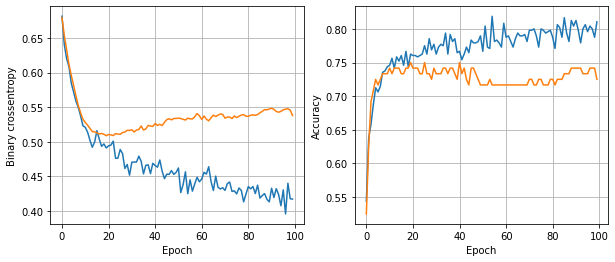

7/7 [==============================] - 0s 834us/step - loss: 0.4308 - accuracy: 0.8000
32 nodes, dropout 0.2, lr 0.001, batch size 64


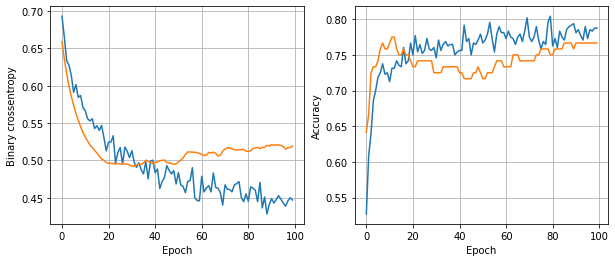

7/7 [==============================] - 0s 834us/step - loss: 0.4347 - accuracy: 0.8000
32 nodes, dropout 0.2, lr 0.001, batch size 128


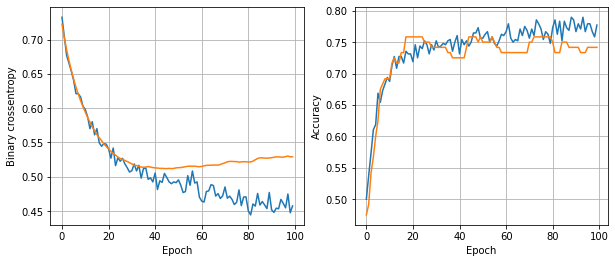

7/7 [==============================] - 0s 833us/step - loss: 0.4468 - accuracy: 0.8050
64 nodes, dropout 0, lr 0.01, batch size 32


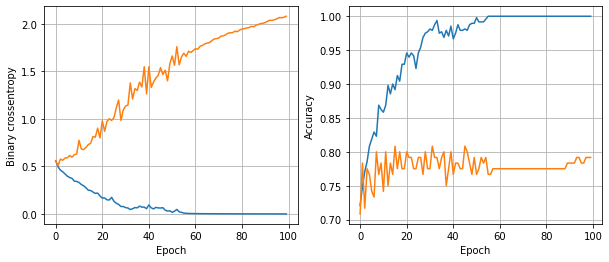

7/7 [==============================] - 0s 834us/step - loss: 1.5453 - accuracy: 0.7900
64 nodes, dropout 0, lr 0.01, batch size 64


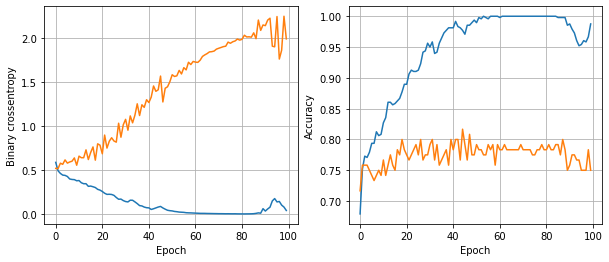

7/7 [==============================] - 0s 667us/step - loss: 1.3408 - accuracy: 0.7700
64 nodes, dropout 0, lr 0.01, batch size 128


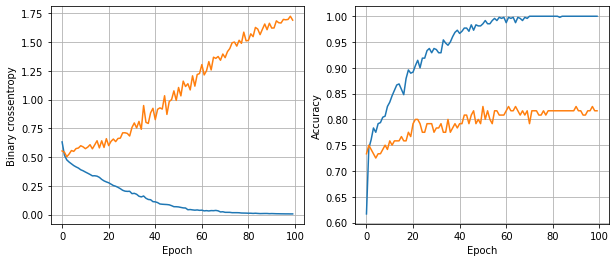

7/7 [==============================] - 0s 667us/step - loss: 1.2710 - accuracy: 0.7850
64 nodes, dropout 0, lr 0.005, batch size 32


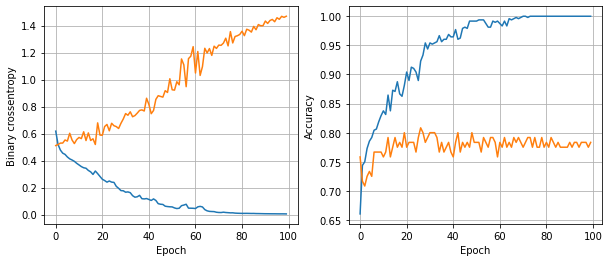

7/7 [==============================] - 0s 834us/step - loss: 1.0385 - accuracy: 0.8200
64 nodes, dropout 0, lr 0.005, batch size 64


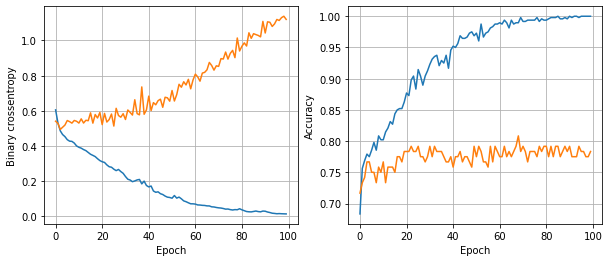

7/7 [==============================] - 0s 834us/step - loss: 1.0249 - accuracy: 0.7850
64 nodes, dropout 0, lr 0.005, batch size 128


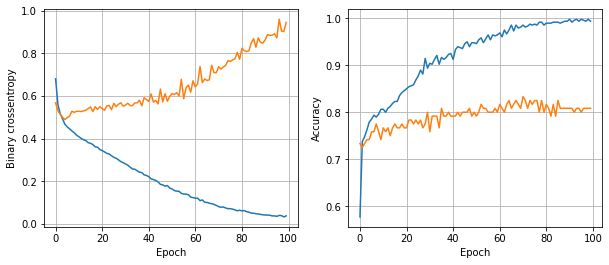

7/7 [==============================] - 0s 834us/step - loss: 0.7570 - accuracy: 0.7950
64 nodes, dropout 0, lr 0.001, batch size 32


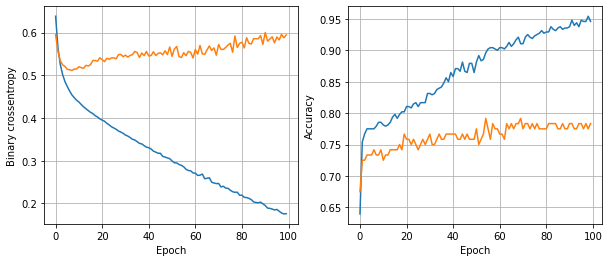

7/7 [==============================] - 0s 834us/step - loss: 0.4762 - accuracy: 0.7850
64 nodes, dropout 0, lr 0.001, batch size 64


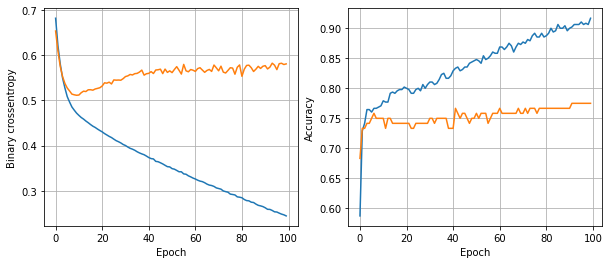

7/7 [==============================] - 0s 834us/step - loss: 0.4438 - accuracy: 0.8000
64 nodes, dropout 0, lr 0.001, batch size 128


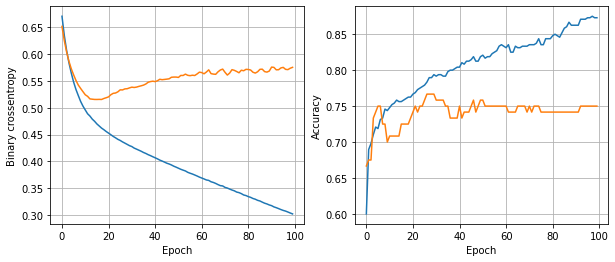

7/7 [==============================] - 0s 833us/step - loss: 0.4476 - accuracy: 0.7950
64 nodes, dropout 0.2, lr 0.01, batch size 32


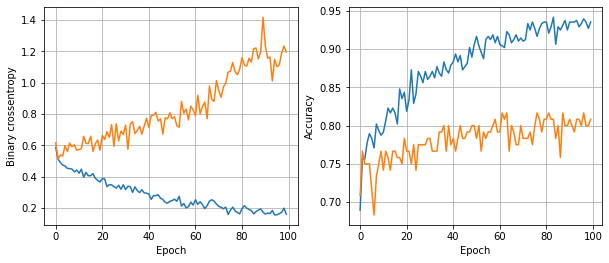

7/7 [==============================] - 0s 834us/step - loss: 0.7590 - accuracy: 0.8150
64 nodes, dropout 0.2, lr 0.01, batch size 64


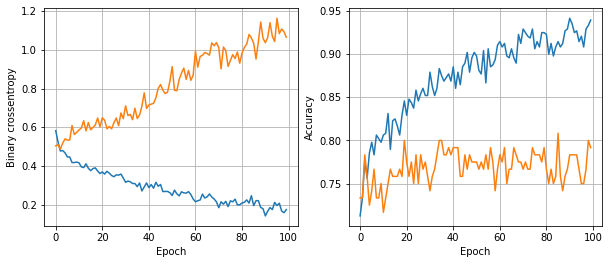

7/7 [==============================] - 0s 833us/step - loss: 0.6404 - accuracy: 0.8100
64 nodes, dropout 0.2, lr 0.01, batch size 128


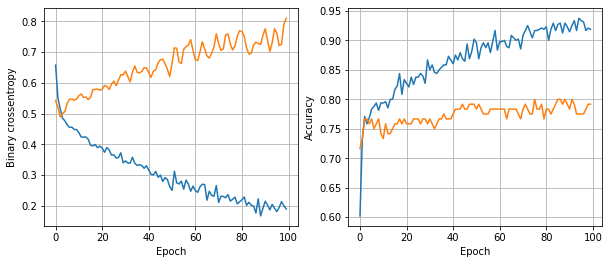

7/7 [==============================] - 0s 834us/step - loss: 0.4949 - accuracy: 0.8350
64 nodes, dropout 0.2, lr 0.005, batch size 32


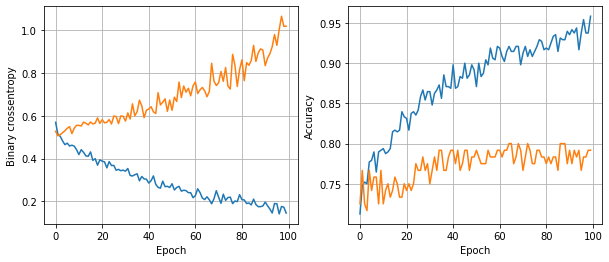

7/7 [==============================] - 0s 667us/step - loss: 0.6212 - accuracy: 0.8200
64 nodes, dropout 0.2, lr 0.005, batch size 64


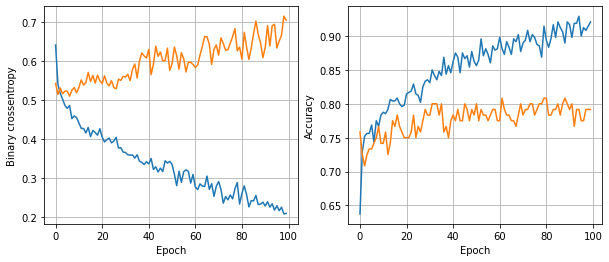

7/7 [==============================] - 0s 834us/step - loss: 0.4790 - accuracy: 0.8250
64 nodes, dropout 0.2, lr 0.005, batch size 128


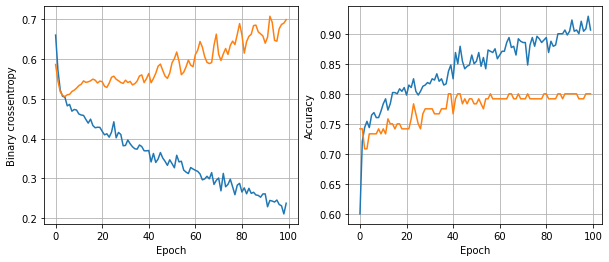

7/7 [==============================] - 0s 833us/step - loss: 0.5888 - accuracy: 0.8050
64 nodes, dropout 0.2, lr 0.001, batch size 32


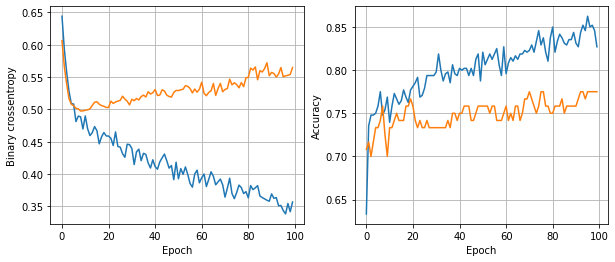

7/7 [==============================] - 0s 667us/step - loss: 0.4768 - accuracy: 0.8100
64 nodes, dropout 0.2, lr 0.001, batch size 64


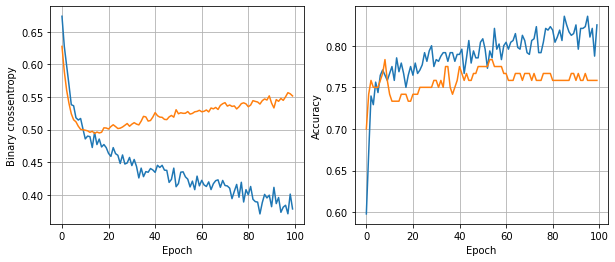

7/7 [==============================] - 0s 667us/step - loss: 0.4362 - accuracy: 0.7950
64 nodes, dropout 0.2, lr 0.001, batch size 128


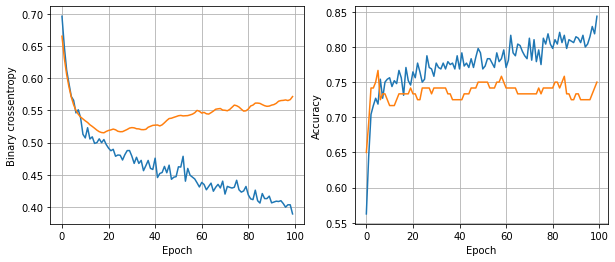

7/7 [==============================] - 0s 667us/step - loss: 0.4441 - accuracy: 0.7750


In [22]:

least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        97
           1       0.80      0.77      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



### SVM

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [27]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        97
           1       0.79      0.83      0.81       103

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

